## 리뷰 크롤링 분석

In [ ]:
from app_store_scraper import AppStore
import pandas as pd
import numpy as np
import datetime as dt

# 앱스토어 객체 생성
my_app = AppStore(country='kr', app_name='HYPE', app_id='6446908786')

my_app.review()

ios_review_df = pd.DataFrame(my_app.reviews)

print(f"가져온 리뷰 수: {len(ios_review_df)}개")
ios_review_df.head()

In [ ]:
from google_play_scraper import reviews, Sort
import pandas as pd
import time

def fetch_reviews(app_id='com.zellu', num_reviews=96):
    all_reviews = []
    continuation_token = None

    while len(all_reviews) < num_reviews:
        try:
            # 리뷰 가져오기
            result, continuation_token = reviews(
                app_id,
                lang='ko',
                country='kr',
                sort=Sort.NEWEST,
                count=100,
                continuation_token=continuation_token
            )

            all_reviews.extend(result)
            print(f"현재 {len(all_reviews)}개의 리뷰를 수집했습니다.")

            if not continuation_token:  # 더 이상 가져올 리뷰가 없으면
                break

            time.sleep(4)  # API 요청 간 2초 대기

        except Exception as e:
            print(f"에러 발생: {e}")
            time.sleep(5)
            continue

    return all_reviews[:num_reviews]

# 리뷰 수집 실행
reviews_data = fetch_reviews()
reviews_df = pd.DataFrame(reviews_data)

print(f"\n총 {len(reviews_df)}개의 리뷰를 수집 완료했습니다.")
reviews_df.to_csv('../review/googleplay/zellu_googleplay_review.csv', index=False, encoding='utf-8-sig')

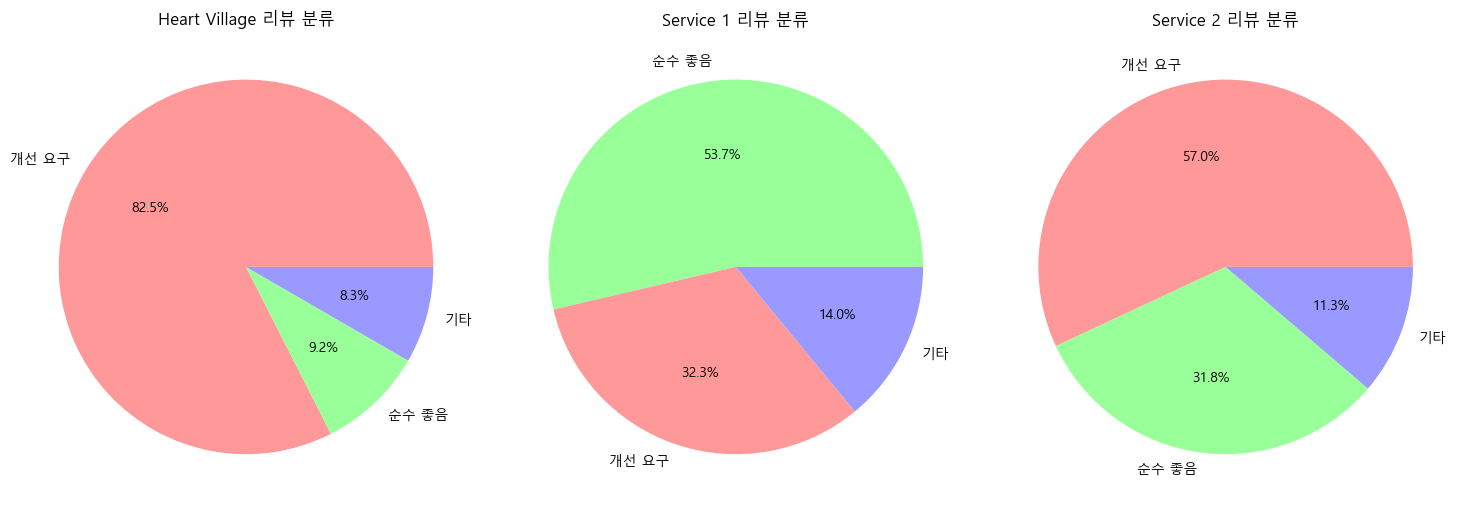


Heart Village 카테고리 분포:
category
개선 요구    702
순수 좋음     78
기타        71
Name: count, dtype: int64

Service 1 카테고리 분포:
category
순수 좋음    1013
개선 요구     610
기타        265
Name: count, dtype: int64

Service 2 카테고리 분포:
category
개선 요구    86
순수 좋음    48
기타       17
Name: count, dtype: int64


In [ ]:
improvement_subcategories = {
    "부정적 감정": [
        '빡치', '짜증', '싫어', '힘들', '힘듭니다',
        '서럽습니다', '화나네요', '미쳐가지고', '선넘네', '얼탱이가',
        '당황스럽네요', '아닌듯해요', '싸울래', '어찌하옵니까',
        '재미없어', '재밌지가않아요', '떨어지네요', '조롱', '상처', '반말',
        '어이업스'
    ],

    "개선/건의": [
        '근데', '좋은데', '조은데', '그런데'
        '개선', '좋겠', '건의', '추가', '수정', '보완',
        '말곤', '빼고', '빼고는', '빼곤',
        '제발', '좋을것', '좋을 것', '좋겟어', '좋게어요', '조을거',
        '고쳐야합니다', '고치면', '바꿔', '바꾸', '편할거같네요', '적고 싶어요',
        '좋을 거 같아요', '좋을거같아요', '좋을꺼 같아요',
        '조을거', '재미있을거'
    ],

    "기능적 불만": [
        '안돼', '안 돼요', '안돼요', '안되요', '안되여',
        '안되나요', '안될까요', '안되네', '안됩니다', '안 되는', '안되는건',
        '안되는데', '안 된다고',
        '못쓰고', '못바', '못하', '밖에', '어케', '어떻게',
        '실수', '0명', '어따', '유료', '됐으면',
        '하나두', '하나도', '없나', '이것만', '이상한', '어렵', '탈주',
        '재미가 없는 것', '다른건', '이러는 건지', '못 보는',
        '귀찮아요', '안들어와요', '안들어와', '안 들어와',
        '안 떠요', '안떠요', '안뜨', '안뜨네', '안뜨느넫', '안뜨고', '안뜨는데',
        '안보여요', '안보이고', '돈벌려고', '돈 벌려고', '눌렀는지',
        '못했는데', '못 찾아', '인증', '로그인', '로그인이',
        '너무 길어요', '해야하나요', '하라길래', '오픈이',
        '딴 건', '다 좋습', '안 되네',
        '접속할수', '접속할 수', '안남겨져', '안 남겨져',
        '못 달아', '못달아', '해지', '넘어가질',
        '작동하지', '취소되나요', '가능한가',
        '모르는 사람', '돌팔아', '어디갔죠', '열리나요', '사라졌어요',
        '불러올수없는', '불러올슈없는'
    ],

    "문제 제기": [
        '버그', '문제', '단점', '오류', '렉',
        '서버연결', '서버가', '실패', '튕김', '튕깁',
        '끊겼다', '끊겻다', '로딩이', '왜그런거죠', '왜그런',
        '왜 그런', '왜 있는', '왜이런가요', '왜구럴까',
        '왜 이러', '왜이러', '발생합니다', '그외는',
        '오래걸려요','밖에', '준비중', '로그인', '로그인이'
    ],

    "요청/제안": [
        '문의', '방법', '보시면', '답해주', '바랍니다', '필요해요',
        '있었으면', '욜어주세', '만들어주세요', '만들아주세요', '넣오주세용',
        '해주세뇨', '해주십시', '오픈좀', '오픈좀요', '열어주세',
        '오픈해', '오픈해주', '넣어주셨으면', '넣어주세',
        '섞어주세요', '줄여주세요', '도와주세요',
        '돌려주세요', '보고싶어요', '계속 로그아웃',
        '꺼주세요', '해겨뢔두세요', '언제 오픈',
        '오픈이', '언제오나', '언제 오나', '언제되나요'
    ],

    "기대 불충족/아쉬움": ['아쉬', '없을까요', '없어요', '확인할 수가',
    '없애는 것', '없애주세요',
    '모르겠어요', '모르겟어요', '모르겠어', '모르겠오',
    '알려주세요', '알려주세오', '알러주세',
    '알수있나요', '알수잇나요', '볼 수 있나요',
    '더 좋았어요', '무슨일'
    ],

    "속도/성능": [
        '느려요', '갑자기', '느리게', '기다리고', '한참이나'
    ]
}


positive_subcategories = {

    "재미/참신/중독": [
        '재밌', '재밋', '재미', '신박', '참신', '신선',
        '잼있', '재밋는', '잼잇', '쟘있', '개잼',
        '개꿀잼', '꿀잼', '꿀잰', '극락', '웃김',
        '맛도리', '중독성', '중독', '금방 가는', '제미', '신기', '새로웠'
    ],

    "좋음/만족":[
        '좋은', '좋아요', '좋네', '좋다', '좋고',
        '좋음', '좋아', '좋았어', '좋았', '만족',
        '좋습', '좋아짐', '젛아', '조음', '조아', '조어',
        '나쁘지 않다', '나쁘지않다', '괜찮', '깔끔', '추천', '최고',
        '굿', '구웃', 'Good', '나이스', '대박',
        '굳', '따봉', '대단한', '쩔어요', '쩔어',
        'b', 'OOD', 'GOO', '무조건',
        '화이팅', '흥하세요', '기모찌', '기머띠', '뭘고민해',
        'siu', 'jam', '와', '존경', '빛',  '쩜',  '굳이',
        '즐기고', '즐길', '이용',
        '쓸수', '쓸 수', '개꿀', '쓸만',
        '해볼만한', '잘 쓰고', '잘쓰고',
        '취향', '빠져', '계속 하다',
        '시간가는줄', '당장', '심심할 틈',
        '까세요', '그대로', '졸다', '느낀점',
        '안깜', '깔아',
        '할만','상', '간단히'
    ],

    "사랑/행복": [
        '사랑', '감사', '행복', '설레',
        '썸', '사겼', '고백', '유익'
    ],
    "친구/소통": [
        '친구들이랑', '친구들과', '친구', '친절', '마음', '접점',
        '소통', '선배', '인싸', '친해', '돈독', '속마음', '표현', '눈치',
        '알수있음', '알수있어요'
    ]
}

improvement_keywords = []
for kw_list in improvement_subcategories.values():
    improvement_keywords.extend(kw_list)
improvement_keywords = list(set(improvement_keywords))

positive_keywords = []
for kw_list in positive_subcategories.values():
    positive_keywords.extend(kw_list)
positive_keywords = list(set(positive_keywords))

def categorize_review(review):
    review = str(review)
    if any(keyword in review for keyword in improvement_keywords):
        return '개선 요구'
    elif any(keyword in review for keyword in positive_keywords):
        return '순수 좋음'
    return '기타'

def get_subcategory(review, main_category):

    if main_category == '개선 요구':
        for subcat, kw_list in improvement_subcategories.items():
            if any(k in review for k in kw_list):
                return subcat
        return '기타(개선 내부)'


    elif main_category == '순수 좋음':
        for subcat, kw_list in positive_subcategories.items():
            if any(k in review for k in kw_list):
                return subcat
        return '기타(긍정 내부)'

    else:
        return None

for df in [hype_emb_high, omg_emb_high, zellu_emb_high]:
    # 먼저 상위 카테고리 분류
    df['category'] = df['cleaned_review'].apply(categorize_review)

    # 세부 카테고리 분류
    df['sub_category'] = df.apply(
        lambda row: get_subcategory(row['cleaned_review'], row['category']), axis=1
    )

colors = {
    '개선 요구': '#FF9999',
    '순수 좋음': '#99FF99',
    '기타': '#9999FF'
}

plt.figure(figsize=(15, 5))

# Hype
plt.subplot(131)
hype_counts = hype_emb_high['category'].value_counts()
plt.pie(hype_counts, labels=hype_counts.index,
        colors=[colors[cat] for cat in hype_counts.index],
        autopct='%1.1f%%')
plt.title('Heart Village 리뷰 분류')

# OMG
plt.subplot(132)
omg_counts = omg_emb_high['category'].value_counts()
plt.pie(omg_counts, labels=omg_counts.index,
        colors=[colors[cat] for cat in omg_counts.index],
        autopct='%1.1f%%')
plt.title('Service 1 리뷰 분류')

# Zellu
plt.subplot(133)
zellu_counts = zellu_emb_high['category'].value_counts()
plt.pie(zellu_counts, labels=zellu_counts.index,
        colors=[colors[cat] for cat in zellu_counts.index],
        autopct='%1.1f%%')
plt.title('Service 2 리뷰 분류')

plt.tight_layout()
plt.show()

print("\nHeart Village 카테고리 분포:")
print(hype_counts)
print("\nService 1 카테고리 분포:")
print(omg_counts)
print("\nService 2 카테고리 분포:")
print(zellu_counts)